# Intro 

We know simple pendulum in small angle approximation can be describe by the differential equation for simple harmonic oscillators. 

Now we try to make a program, not using small angle approximation, to simulate the motion of the pendulum. At the end of this project, we will have a Vpython simulation of the motion of simple pendulum. 

# Theory 

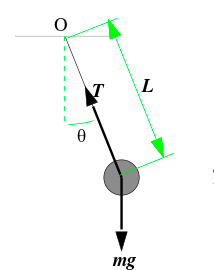 Picture is from <a href= "https://www.isical.ac.in/~arnabc/numana/diff1.html?utm_source=pocket_mylist"> this website </a> 

We have the following relations between cartesian and polar coordinates: 

$$x= L \sin\theta$$
$$y = - L \cos\theta $$

Relationship between angular velocity and the components of the velocity vector: 
$$v_x = v \cos \theta$$
$$v_y = v \sin \theta$$

Using Lagrangian, we can prove that the differential equation for the system in polar coordinates (see the figure) is:

$$\ddot{\theta}= - \frac{g}{L}\sin\theta$$

where $g=9.81 m/s^2$ is gravitational acceleration on Earth

# Implementation 

Now we can approximate the position of the pendulum using following iteration (usually used for differential equation): 

$$\theta_k = \theta_{k-1}+ \omega_{k-1} \Delta t $$ 
$$\omega_k = \omega_{k-1}+\frac{g}{L} \sin \theta_{k-1}\Delta t  $$

In [ ]:
from vpython import * 
import numpy as np 
import simple_pendulum_functions


# declaring constants 
g= 9.81 #m/s^2, gravitational acceleration 
L = 10 #m, the length of the string 
omega_0=0  # starting angular speed 
theta_0= np.pi/3  #starting angle 





#declaring starting position of the ball
theta= theta_0  
x= L * sin(theta)
y =  - L  *cos(theta)
z=0
# declaring starting velocity for the ball 
omega= omega_0
v_x= (omega* L )* cos(theta)  # x-component of the velocity 
v_y = (omega*L )* sin(theta) #y-component of the velocity 
v_z=0 




ball= sphere(pos= vec(x, y, z ),radius= 0.5, color= color.cyan, make_trail= True, texture= textures.wood )    # ball
reference_wall= box(pos= vec(0,0,0), size= vec(10, 0.2, 10))                                                # wall 
y_axis= arrow(pos= vec(0,0,0), axis= vec(0, 10, 0), color=color.red)             # y-axis of the coordinate system 
c= curve(vec(0,0,0), ball.pos, color= color.yellow)                              # create a string for the ball 


# declaring variables for the loop
ball.velocity = vec(v_x, v_y, v_z) # velocity of the ball 
deltat= 0.005                   # timedelta 
t=0                           # counter 


#creating vector arrow for visualizing the velocity 
vscale=0.5  # scaling the arrow 
varr= arrow(pos= ball.pos, axis=vscale * ball.velocity, color= color.yellow) # the vector arrow




scene.autoscale= False # turn off autoscaling of the camera 


# animation
while t<100: 
    #updating the velocity 
    omega= omega+ g/L *sin(theta)*deltat             # updating the angular speed 
    v_x= (omega* L )* cos(theta)  # x-component of the velocity 
    v_y = (omega*L )* sin(theta) #y-component of the velocity 
    v_z=0 
    ball.velocity=  vec(v_x, v_y, v_z)      # updating the velocity of the ball 
    
    
    
    # updating the position 
    theta = theta- omega* deltat # updating the angle
    x= L * sin(theta)        # x 
    y =  - L  *cos(theta) # y 
    z=0           # z 
    ball.pos= vec(x, y, z)  # updating the position of the ball
    
   
    # updating the string position 
    c.modify(1, ball.pos)

    
   # updating the arrow position 
    varr.pos= ball.pos 
    varr.axis= -vscale*ball.velocity 
    
    
    # increase time 
    t= t+ deltat
    rate(200)
    
    
    